In [89]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [90]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (5, 2)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [91]:

new_color = [
'#b3e2cd',
'#fdcdac',
'#cbd5e8',
'#f4cae4',
'#e6f5c9',
'#fff2ae',
'#f1e2cc',
'#cccccc',
]


''' Stage Size: Load data from file. '''
csv_path = './1_performance/lowassoc.csv'
workload_list = ['602', '603', '605', '607', '619', '620', '627', '649', '654', '657', 'twitter', 'web', 'resnet50', 'resnext50', 'YCSB-A', 'YCSB-B', 'Geomean']
scheme_list = ['Baseline', 'YACC', 'Unison Cache', 'Baryon']
workload_dict = {item: item for item in workload_list}
scheme_dict = {item: item for item in scheme_list}

stagesize_title = 'Normalized Performance'
fig_name = 'graph_perf_lowassoc'
stagesize_ylim = (0, 2.0)
stagesize_yticks = list(np.arange(stagesize_ylim[0], stagesize_ylim[1]+0.01, 0.5))


fpcache_color = new_color[0]
base_color = new_color[1]
yacc_color = new_color[2]
baryon_color = new_color[6]
hybrid2_color = new_color[3]
baryon_high_color = easypyplot.color.COLOR_SET[0]
stagesize_bar_colors = [base_color, yacc_color, fpcache_color, baryon_color]
assert len(stagesize_bar_colors) == len(scheme_dict)

# pprint(stagesize_yticks)
csv_hd = pd.read_csv(csv_path, sep=',')
stagesize_xlabels = []
stagesize_xticks = []
stagesize_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        stagesize_data_2darr.append(row_value)
        workload_shortname = workload_fullname
        if workload_fullname.startswith('6'):
            workload_shortname = workload_fullname[0:3]
        stagesize_xlabels.append(workload_shortname)
        xtick += 1
        stagesize_xticks.append(xtick)
assert len(stagesize_data_2darr) == len(stagesize_xlabels) == len(stagesize_xticks)

pprint(stagesize_data_2darr)

pprint(stagesize_bar_colors)

[[1.0, 1.0552, 1.1982, 1.3414],
 [1.0, 1.0495, 0.9603, 1.1365],
 [1.0, 1.0278, 1.1348, 1.1103],
 [1.0, 1.0164, 1.2523, 1.3002],
 [1.0, 0.963, 1.238, 1.1304],
 [1.0, 1.0398, 1.2037, 1.2785],
 [1.0, 1.0159, 1.3912, 1.2075],
 [1.0, 1.1255, 1.257, 1.3251],
 [1.0, 1.127, 1.3396, 1.3396],
 [1.0, 1.0427, 0.9644, 0.9495],
 [1.0, 1.0291, 0.9469, 1.223],
 [1.0, 1.0812, 0.8275, 1.3458],
 [1.0, 1.0034, 0.989, 1.2224],
 [1.0, 1.0043, 0.8922, 1.1541],
 [1.0, 1.1599, 1.0389, 1.2822],
 [1.0, 1.1001, 0.9289, 1.2415],
 [1.0, 1.0224, 0.9338, 1.1293],
 [1.0, 1.0185, 0.9053, 1.1345],
 [1.0, 1.0478, 1.065, 1.2094]]
['#fdcdac', '#cbd5e8', '#b3e2cd', '#f1e2cc']


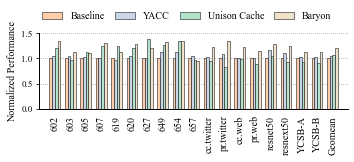

In [92]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
stagesize_ax = fig.add_subplot(1, 1, 1)
# stagesize_ax2 = stagesize_ax.twinx()
# easypyplot.format.turn_off_box(stagesize_ax, twinx_axes=stagesize_ax2)
easypyplot.format.turn_off_box(stagesize_ax)
stagesize_h = easypyplot.barchart.draw(
    stagesize_ax, stagesize_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=stagesize_xlabels,
    xticks=stagesize_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=90,
    prop=ft,
    colors=stagesize_bar_colors)
''' x axis '''
stagesize_ax.set_xlim([stagesize_ax.get_xticks()[0] - 1, stagesize_ax.get_xticks()[-1] + 1])
stagesize_ax.set_xticks(stagesize_xticks)
stagesize_ax.set_xticklabels(stagesize_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
stagesize_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# stagesize_ax.tick_params(direction='in') # [in, out, inout]
stagesize_ax.set_xlabel('', fontproperties=ft)
''' y axis '''
stagesize_ax.yaxis.grid(True)
stagesize_ax.set_ylim([0, 1.5])
stagesize_ax.set_yticks([0, 0.5, 1, 1.5])
stagesize_ax.set_ylabel(stagesize_title, multialignment='center', fontproperties=ft)
# stagesize_ax2.set_ylim([0., 1.])
# stagesize_ax2.set_ylabel('Committed Block Hit Rate', multialignment='center', fontproperties=ft)
''' legend '''
# h, l = stagesize_ax.get_legend_handles_labels()
# stagesize_ax.legend(handles=[item for item in h[:-1]], labels= [item for item in l[:-1]])

legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(stagesize_h, legend, loc='upper left', bbox_to_anchor=(0.1, 1.13),
        ncol=4, frameon=False, prop=ft, columnspacing=1, labelspacing=0.1)

''' last resize '''
plt.tight_layout()
# easypyplot.format.resize_ax_box(stagesize_ax, hratio=0.8)

In [93]:
''' Save figures'''
fig.savefig('/scorpio/home/liyiwei/micro22rebuttal/graph_perf_lowassoc.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures

## High-assoc

In [94]:

''' Stage Size: Load data from file. '''
csv_path = './1_performance/highassoc.csv'
workload_list = ['602', '603', '605', '607', '619', '620', '627', '649', '654', '657', 'twitter', 'web', 'resnet50', 'resnext50', 'YCSB-A', 'YCSB-B', 'Geomean']
scheme_list = ['Hybrid2', 'Baryon-High']
workload_dict = {item: item for item in workload_list}
scheme_dict = {item: item for item in scheme_list}

stagesize_title = 'Normalized Performance'
fig_name = 'graph_perf_highassoc'
stagesize_ylim = (0, 1.6)
stagesize_yticks = list(np.arange(stagesize_ylim[0], stagesize_ylim[1]+0.01, 0.5))

fpcache_color = new_color[0]
yacc_color = new_color[2]
baryon_color = new_color[6]
hybrid2_color = new_color[3]
yacc_high_color = easypyplot.color.color_scale(yacc_color, 2, low=0.8, high=0.9) [1]
baryon_high_color = easypyplot.color.color_scale(baryon_color, 2, low=0.8, high=0.9) [1]
stagesize_bar_colors = [hybrid2_color, baryon_high_color]
assert len(stagesize_bar_colors) == len(scheme_dict)

# pprint(stagesize_yticks)
csv_hd = pd.read_csv(csv_path, sep=',')
stagesize_xlabels = []
stagesize_xticks = []
stagesize_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        stagesize_data_2darr.append(row_value)
        workload_shortname = workload_fullname
        if workload_fullname.startswith('6'):
            workload_shortname = workload_fullname[0:3]
        stagesize_xlabels.append(workload_shortname)
        xtick += 1
        stagesize_xticks.append(xtick)
assert len(stagesize_data_2darr) == len(stagesize_xlabels) == len(stagesize_xticks)

pprint(stagesize_data_2darr)

pprint(stagesize_bar_colors)

[[1.0, 1.3851],
 [1.0, 1.1036],
 [1.0, 1.2089],
 [1.0, 1.0254],
 [1.0, 0.9751],
 [1.0, 1.5007],
 [1.0, 1.0101],
 [1.0, 1.3921],
 [1.0, 1.3228],
 [1.0, 0.9747],
 [1.0, 1.0412],
 [1.0, 1.2149],
 [1.0, 1.1397],
 [1.0, 1.0261],
 [1.0, 1.4977],
 [1.0, 1.1928],
 [1.0, 1.1326],
 [1.0, 1.0584],
 [1.0, 1.1662]]
['#f4cae4', (0.9019607843137255, 0.8458221462859002, 0.7634854771784233, 1.0)]


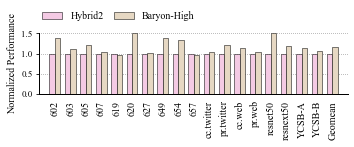

In [95]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
stagesize_ax = fig.add_subplot(1, 1, 1)
# stagesize_ax2 = stagesize_ax.twinx()
# easypyplot.format.turn_off_box(stagesize_ax, twinx_axes=stagesize_ax2)
easypyplot.format.turn_off_box(stagesize_ax)
stagesize_h = easypyplot.barchart.draw(
    stagesize_ax, stagesize_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=stagesize_xlabels,
    xticks=stagesize_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=90,
    prop=ft,
    colors=stagesize_bar_colors)
''' x axis '''
stagesize_ax.set_xlim([stagesize_ax.get_xticks()[0] - 1, stagesize_ax.get_xticks()[-1] + 1])
stagesize_ax.set_xticks(stagesize_xticks)
stagesize_ax.set_xticklabels(stagesize_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
stagesize_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# stagesize_ax.tick_params(direction='in') # [in, out, inout]
stagesize_ax.set_xlabel('', fontproperties=ft)
''' y axis '''
stagesize_ax.yaxis.grid(True)
stagesize_ax.set_ylim((0, 1.5))
stagesize_ax.set_yticks(stagesize_yticks)
stagesize_ax.set_ylabel(stagesize_title, multialignment='center', fontproperties=ft)
# stagesize_ax2.set_ylim([0., 1.])
# stagesize_ax2.set_ylabel('Committed Block Hit Rate', multialignment='center', fontproperties=ft)
''' legend '''
# h, l = stagesize_ax.get_legend_handles_labels()
# stagesize_ax.legend(handles=[item for item in h[:-1]], labels= [item for item in l[:-1]])

# stagesize_ax.text(5 + fig_bar_width - 0.3, 1.5, '2.07', color='#000000', fontproperties=ft)
# stagesize_ax.text(14 + fig_bar_width - 0.3, 1.5, '1.62', color='#000000', fontproperties=ft)

legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(stagesize_h, legend, loc='upper left', bbox_to_anchor=(0.1, 1.13),
        ncol=3, frameon=False, prop=ft, columnspacing=1, labelspacing=0.1)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(stagesize_ax, hratio=0.8)

In [96]:
''' Save figures'''
fig.savefig('/scorpio/home/liyiwei/micro22rebuttal/graph_perf_highassoc.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures

: 